<a href="https://colab.research.google.com/github/toshineb/CreditCard-Fraud/blob/main/CreditCard_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DataSet Information
This is a standard supervised classification task. A classification problem where we have to predict whether a  credit card transactions is Not fraud = 0, Fraud = 1
. The dataset has 31 feautures.

## Import Modules

In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## Loading the Dataset

In [ ]:
# Read the file via pandas
df = pd.read_csv('creditcard.csv')

In [ ]:
# Firts 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# statistical summary
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Dataset shape
df.shape

(284807, 31)

## PreProcessing

In [ ]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Missing Values

In [ ]:
# Check for nulls
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Dropping unnecessary feature

In [ ]:
# unnecessary Feature dropping
df = df.drop(['Time'], axis = 1)

### Check for Duplicates

In [ ]:
# Check for duplicate
df.duplicated().any()

np.True_

In [ ]:
# Drop the duplicates
df = df.drop_duplicates()

### Standardizing

In [ ]:
# Standardizing 'amount' column since the others are in range
sc = StandardScaler()
df['Amount'] = sc.fit_transform(df[['Amount']])

In [ ]:
df['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

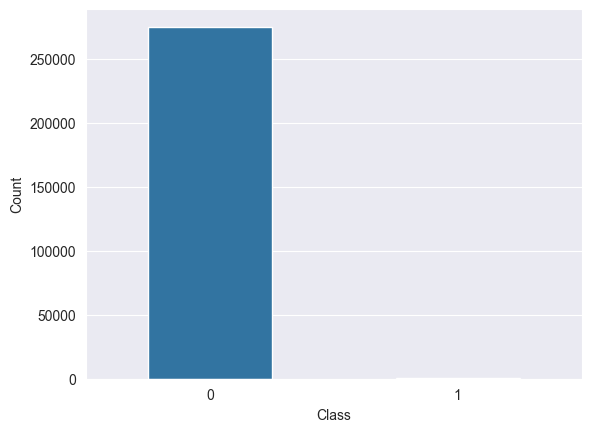

In [ ]:
# Visulize Class distribution
sns.countplot(data=df, x='Class', width = 0.5)
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

=> highly imbalanced data

<Axes: >

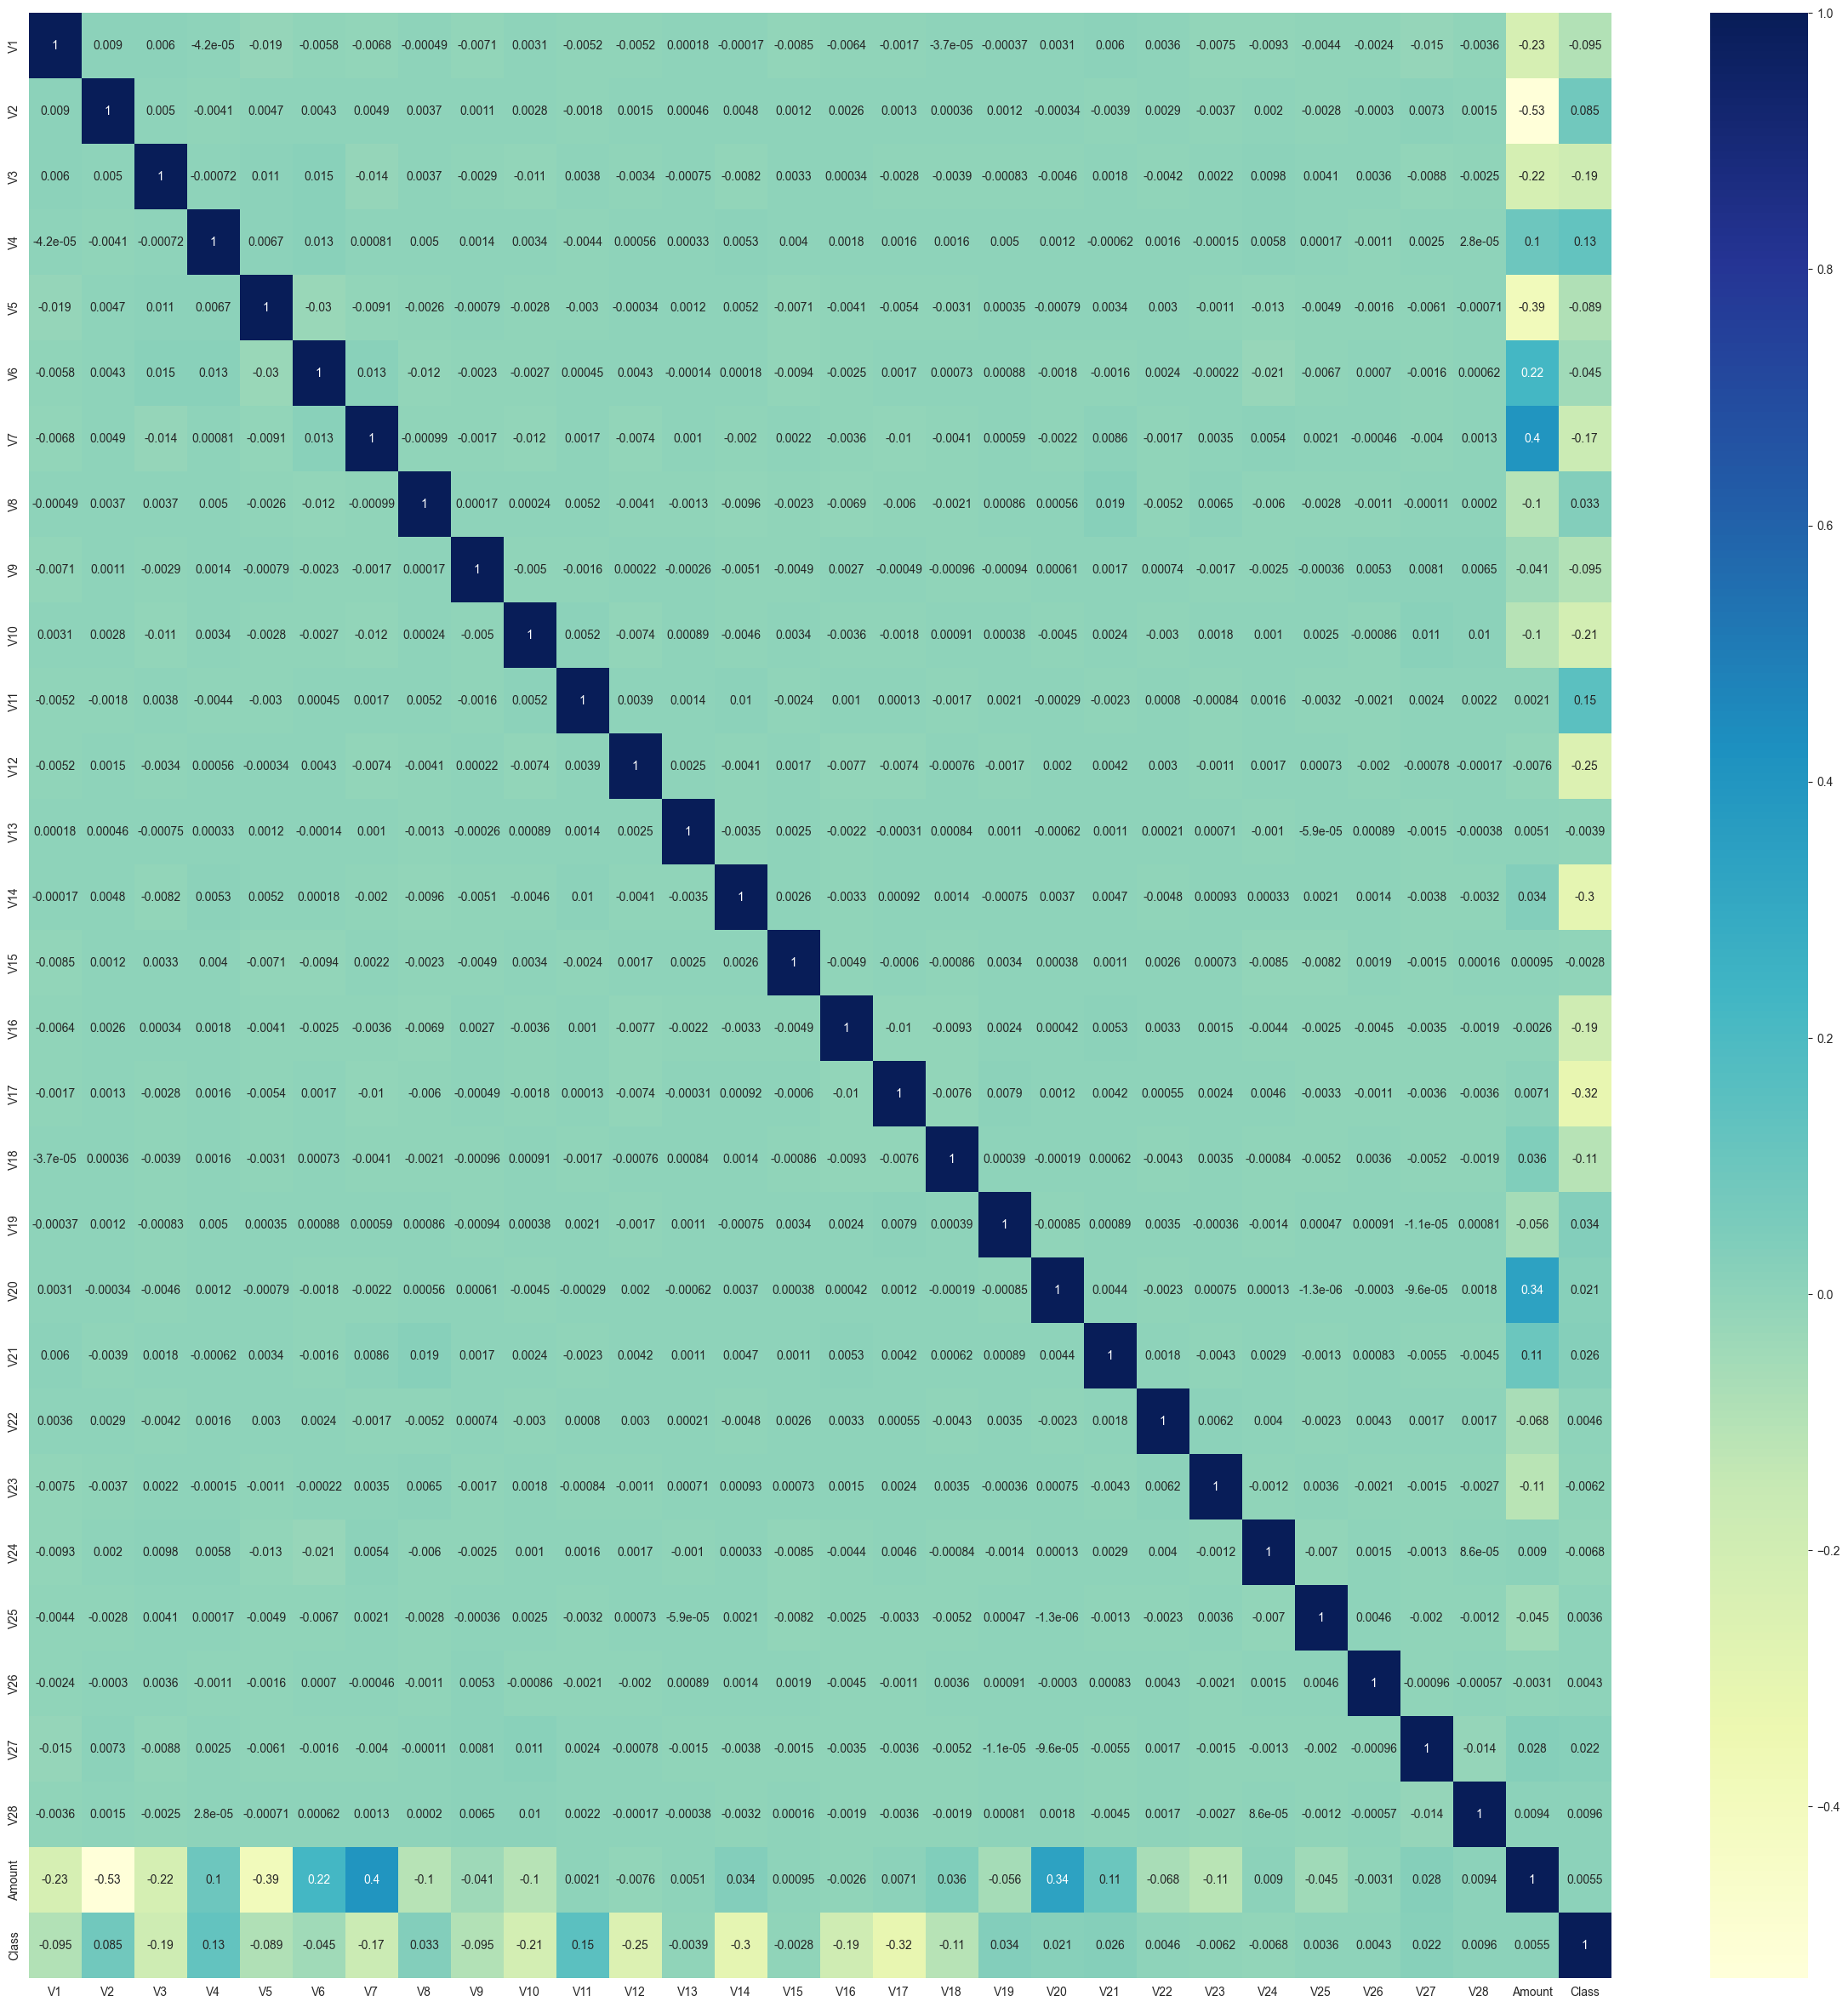

In [ ]:
plt.figure(figsize = (30, 30))
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")

## Handeling imbalanced data via Under Sampling and train the models

In [ ]:
# Handeling imbalanced dataset with undersampling
normal = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]
fraud.shape

(473, 30)

In [ ]:
normal.shape

(275190, 30)

In [ ]:
normal_sample = normal.sample(n=473)
normal_sample.shape

(473, 30)

In [ ]:
# Concat new dataset with sample data
new_df = pd.concat([normal_sample, fraud], ignore_index = True)
new_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-4.383279,-4.757517,0.438866,-0.198281,2.608132,-3.663564,-2.135915,0.489790,-1.353560,0.168624,...,0.221900,-0.771003,0.087597,0.475949,-0.413173,0.789405,0.250802,-0.646029,-0.109190,0
1,2.049220,0.059555,-1.788613,0.254021,0.528658,-0.442404,0.034484,-0.039505,0.343932,-0.190328,...,-0.335419,-0.924131,0.307716,0.239293,-0.278827,0.170351,-0.070707,-0.044402,-0.354201,0
2,2.063958,0.275451,-1.819714,1.381553,0.945931,-0.424565,0.463071,-0.351973,1.568338,-0.109581,...,-0.138386,0.008697,-0.011238,0.199819,0.499545,-0.532715,-0.050724,-0.066046,-0.302466,0
3,1.397672,-1.193495,0.511394,-1.284254,-1.761512,-1.003313,-0.945143,-0.171144,-1.684198,1.419621,...,-0.431631,-1.084732,0.173972,0.285789,0.063375,-0.482333,0.018001,0.035983,-0.077320,0
4,2.188694,-0.842357,-1.101491,-0.957084,-0.865584,-1.140878,-0.649480,-0.144207,-0.452430,1.087916,...,0.382837,1.019270,0.095038,0.072368,-0.032963,-0.055431,-0.043207,-0.075749,-0.354675,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.182487,1
942,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.354714,1
943,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.050109,1
944,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.609848,1


In [ ]:
# Define dependent and independet variables
X = new_df.drop(['Class'], axis = 1)
y = new_df['Class']

In [ ]:
# Split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Choosing the best model using cross val
# Define a dictionary of models
models =  {'logestic_regression' : LogisticRegression(),'descion_tree' : DecisionTreeClassifier(), 'random_forest' : RandomForestClassifier() , 'XGBoost' : XGBClassifier()}
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for model_name, model in models.items():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    y_pred = cross_val_predict(model, X_train, y_train, cv=kf)

    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)

    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)

# Create a DataFrame to store the results
results_df = pd.DataFrame(results)

print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  logestic_regression  0.937831   0.962857  0.908356  0.934813
1         descion_tree  0.904762   0.884319  0.927224  0.905263
2        random_forest  0.925926   0.953890  0.892183  0.922006
3              XGBoost  0.937831   0.962857  0.908356  0.934813


In [ ]:
acc_scores= pd.DataFrame({'Models' : ['LR', 'DT', 'RF', 'XG'],
             'ACC': results_df['Accuracy']*100})
acc_scores

,Models,ACC
0,LR,93.783069
1,DT,90.476190
2,RF,92.592593
3,XG,93.783069


## Handeling imbalanced data via Over Sampling and train the models

In [ ]:
# Handeling imbalanced dataset with oversampling
X = df.drop(['Class'], axis = 1)
y = df['Class']

In [ ]:
# Over sampling
X_res, y_res = SMOTE().fit_resample(X,y)

In [ ]:
y_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

In [ ]:
# Split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

In [ ]:
# Choosing the best model using cross val
# Define a dictionary of models
models =  {'logestic_regression' : LogisticRegression(),'descion_tree' : DecisionTreeClassifier(), 'random_forest' : RandomForestClassifier() , 'XGBoost' : XGBClassifier()}

for model_name, model in models.items():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    y_pred = cross_val_predict(model, X_train, y_train, cv=kf)

    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)

    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)

# Create a DataFrame to store the results
results_df = pd.DataFrame(results)

print(results_df)

In [ ]:
acc_scores= pd.DataFrame({'Models' : ['LR', 'DT', 'RF', 'XG'],
             'ACC': results_df['Accuracy']*100})
acc_scores

# Save the Model

In [ ]:
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, ['Amount'])])

# Define your classifier separately within the pipeline
classifier = RandomForestClassifier()

# Create the pipeline with all the steps, including the classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', classifier)])

# Define hyperparameters to search over
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create a grid search object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

In [ ]:
# Fit the model
best_model.fit(X_res, y_res)

In [ ]:
pred_training_data = best_model.predict(X_train)
accuracy_training_data = accuracy_score(pred_training_data, y_train)
accuracy_training_data

In [ ]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

In [ ]:
import joblib

In [ ]:
# Save the model
joblib.dump(best_model, 'credit_card_model')

In [ ]:
# Call the model
model = joblib.load('credit_card_model')

In [ ]:
# Predict
model.predict([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])